<a href="https://colab.research.google.com/github/thaiqtran/EE-399-HW-3/blob/main/Hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EE 399 HW 3

Problem set 1

1)
Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image


In [19]:
#importing all the needed source 
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml 


In [20]:

# Load the MNIST data
mnist = fetch_openml('mnist_784', parser='auto')

X, y = mnist.data, mnist.target
X = X / 255.0  # Scale the pixel values to [0, 1]

# Reshape each image into a column vector
X_col = X.T

U, Sigma, Vt = np.linalg.svd(X_col, full_matrices=False)
# Print the shape of U
print("U shape:", U.shape)


U shape: (784, 784)


Part 2)


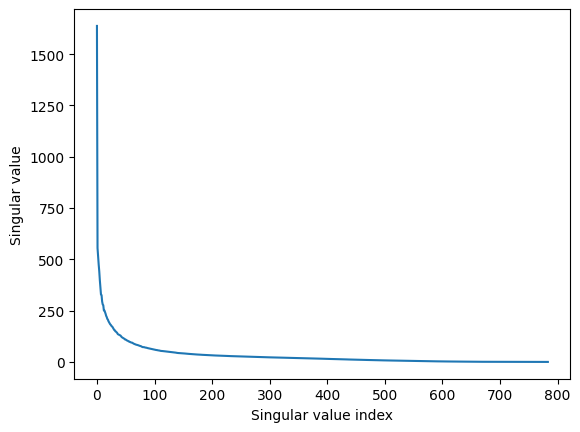

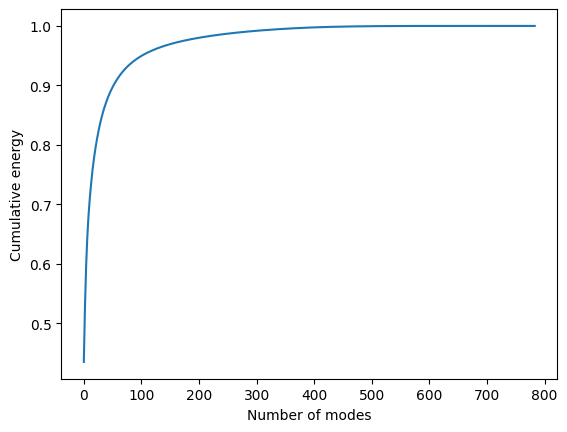

The rank r of the digit space is 53


In [21]:
# Plot the singular values
plt.plot(Sigma)
plt.xlabel('Singular value index')
plt.ylabel('Singular value')
plt.show()
# Plot the cumulative sum of singular values
cumulative_energy = np.cumsum(Sigma**2) / np.sum(Sigma**2)
# Plot the cumulative energy
plt.plot(cumulative_energy)
plt.xlabel('Number of modes')
plt.ylabel('Cumulative energy')
plt.show()

r = np.argmax(cumulative_energy >= 0.9) + 1 # add 1 because of zero indexing
print("The rank r of the digit space is {:.0f}".format(r))

Part 3) What is the interpretation of the U, Σ, and V matrices?

Answer:
**U (Left singular vectors)**: U is an orthogonal matrix whose columns are the left singular vectors of the data matrix. In this code, U is obtained using svd.fit_transform(X_col). Each column of U represents a reduced-dimensional representation of the original data, where the rows of U are the features (or latent variables) extracted from the data. These left singular vectors represent the directions in the original feature space along which the data varies the most.

**Σ (Singular values)**: Σ is a diagonal matrix containing the singular values, which represent the magnitude of the variation captured by each singular vector. In this code, Σ is obtained using svd.singular_values_. The singular values are sorted in descending order, with the first singular value corresponding to the direction of greatest variation in the data, the second singular value corresponding to the second greatest variation, and so on. The singular values provide information about the importance of each singular vector in capturing the overall variation in the data.

**V (Right singular vectors)**: V is an orthogonal matrix whose rows are the right singular vectors of the data matrix. In this code, V is obtained using svd.components_. Each row of V represents a reduced-dimensional representation of the original features, where the columns of V are the coefficients that map the reduced-dimensional representations back to the original feature space. The right singular vectors represent the contribution of each feature to the original data

4)

Text(0.5, 0, 'V-mode 5')

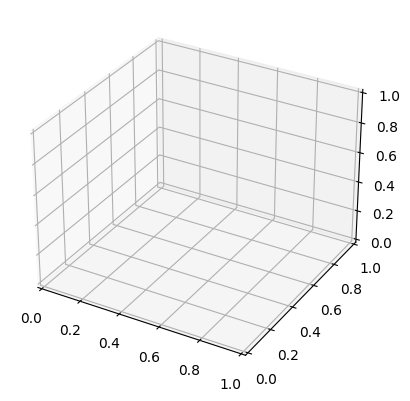

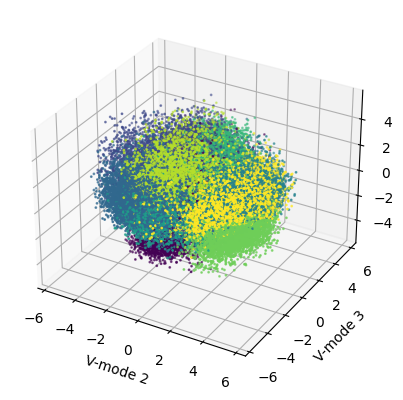

In [22]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# Perform PCA
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
# Select three V-modes (columns) for projection
v_modes = [1, 2, 4]
v_selected = X_pca[:,v_modes]

# Project data onto selected V-modes


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Create scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v_selected[:, 0], v_selected[:, 1], v_selected[:, 2], c=y.astype(int), s=1)

# Set the labels and limits of the plot
ax.set_xlabel('V-mode ' + str(v_modes[0] + 1))
ax.set_ylabel('V-mode ' + str(v_modes[1] + 1))
ax.set_zlabel('V-mode ' + str(v_modes[2] + 1))


#ax.set_xlabel('PC2')
#ax.set_ylabel('PC3')
#ax.set_zlabel('PC5')

#ax.legend(title='Digit Label', loc='center left', bbox_to_anchor=(1, 0.5))

Problem set 2


In [1]:
#importing all the needed source 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Load the MNIST data
mnist = fetch_openml('mnist_784', parser='auto')
X, y = mnist.data, mnist.target
X = X / 255.0  # Scale the pixel values to [0, 1]


In [3]:
# Perform PCA
pca = PCA(n_components=100)  # Use 100 principal components
X_pca = pca.fit_transform(X)


1) Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify
them.

In [4]:
# Select two digits for classification
digit1 = 3
digit2 = 8
idx_digit1 = np.where(y == str(digit1))[0]
idx_digit2 = np.where(y == str(digit2))[0]
X_digit1 = X_pca[idx_digit1]
X_digit2 = X_pca[idx_digit2]
X_combined = np.concatenate((X_digit1, X_digit2), axis=0)
y_combined = np.concatenate((np.zeros(X_digit1.shape[0]), np.ones(X_digit2.shape[0])))
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
# Train LDA classifier
lda = LDA()
lda.fit(X_train, y_train)
# Predict on the testing set
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Accuracy: 96.13%


2)Pick three digits. Try to build a linear classifier to identify these three now.

In [5]:
# Select three digits for classification
digit1 = 3
digit2 = 8
digit3 = 0
idx_digit1 = np.where(y == str(digit1))[0]
idx_digit2 = np.where(y == str(digit2))[0]
idx_digit3 = np.where(y == str(digit3))[0]
X_digit1 = X_pca[idx_digit1]
X_digit2 = X_pca[idx_digit2]
X_digit3 = X_pca[idx_digit3]
X_combined = np.concatenate((X_digit1, X_digit2, X_digit3), axis=0)
y_combined = np.concatenate((np.zeros(X_digit1.shape[0]), np.ones(X_digit2.shape[0]), 2*np.ones(X_digit3.shape[0])))
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
# Train LDA classifier
lda = LDA()
lda.fit(X_train, y_train)
# Predict on the testing set
y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))




Accuracy: 95.64%


3) Which two digits in the data set appear to be the most difficult to separate? Quantify the accuracy
of the separation with LDA on the test data

4) Which two digits in the data set are most easy to separate? Quantify the accuracy of the separation
with LDA on the test data.

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Calculate accuracy for all pairs of digits
digits = np.unique(y)
max_accuracy = 0
min_accuracy = 1
most_difficult_pair = None
easiest_pair = None

for i in range(len(digits)):
    for j in range(i+1, len(digits)):
        digit1 = digits[i]
        digit2 = digits[j]
        
        # Filter data for the current pair of digits
        X_train_pair = X_train[(y_train == digit1) | (y_train == digit2)]
        y_train_pair = y_train[(y_train == digit1) | (y_train == digit2)]
        X_test_pair = X_test[(y_test == digit1) | (y_test == digit2)]
        y_test_pair = y_test[(y_test == digit1) | (y_test == digit2)]
        
        # Train LDA classifier
        lda.fit(X_train_pair, y_train_pair)
        
        # Predict on test data
        y_pred = lda.predict(X_test_pair)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test_pair, y_pred)
        
        # Update max and min accuracy, and most difficult and easiest pair
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            easiest_pair = (digit1, digit2)
        if accuracy < min_accuracy:
            min_accuracy = accuracy
            most_difficult_pair = (digit1, digit2)

print("Most Difficult Pair: Digit {} and Digit {}: Accuracy = {:.4f}".format(most_difficult_pair[0], most_difficult_pair[1], min_accuracy))
print("Easiest Pair: Digit {} and Digit {}: Accuracy = {:.4f}".format(easiest_pair[0], easiest_pair[1], max_accuracy))


Most Difficult Pair: Digit 5 and Digit 8: Accuracy = 0.9498
Easiest Pair: Digit 6 and Digit 7: Accuracy = 0.9969


5)SVM (support vector machines) and decision tree classifiers were the state-of-the-art until about
2014. How well do these separate between all ten digits? (see code below to get started)

In [7]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm = SVC()

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier()
# Train SVM classifier
svm.fit(X_train, y_train)
# Train Decision Tree classifier
dtc.fit(X_train, y_train)
# Predict on test data using SVM
y_pred_svm = svm.predict(X_test)
# Predict on test data using Decision Tree
y_pred_dtc = dtc.predict(X_test)
# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Calculate accuracy for Decision Tree
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)

print("Accuracy of SVM on test data: {:.4f}".format(accuracy_svm))
print("Accuracy of Decision Tree on test data: {:.4f}".format(accuracy_dtc))


Accuracy of SVM on test data: 0.9764
Accuracy of Decision Tree on test data: 0.8708


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hard pair
X_hard_train = X_train[(y_train == '4') | (y_train == '9')]
y_hard_train = y_train[(y_train == '4') | (y_train == '9')]
X_hard_test = X_test[(y_test == '4') | (y_test == '9')]
y_hard_test = y_test[(y_test == '4') | (y_test == '9')]

# Easy pair
X_easy_train = X_train[(y_train == '1') | (y_train == '7')]
y_easy_train = y_train[(y_train == '1') | (y_train == '7')]
X_easy_test = X_test[(y_test == '1') | (y_test == '7')]
y_easy_test = y_test[(y_test == '1') | (y_test == '7')]

# Initialize LDA classifier
lda = LinearDiscriminantAnalysis()

# Initialize SVM classifier
svm = SVC()

# Initialize Decision Tree classifier
dtc = DecisionTreeClassifier()

# Train LDA classifier on hard pair
lda.fit(X_hard_train, y_hard_train)
y_pred_lda_hard = lda.predict(X_hard_test)
accuracy_lda_hard = accuracy_score(y_hard_test, y_pred_lda_hard)

# Train SVM classifier on hard pair
svm.fit(X_hard_train, y_hard_train)
y_pred_svm_hard = svm.predict(X_hard_test)
accuracy_svm_hard = accuracy_score(y_hard_test, y_pred_svm_hard)

# Train Decision Tree classifier on hard pair
dtc.fit(X_hard_train, y_hard_train)
y_pred_dtc_hard = dtc.predict(X_hard_test)
accuracy_dtc_hard = accuracy_score(y_hard_test, y_pred_dtc_hard)

# Train LDA classifier on easy pair
lda.fit(X_easy_train, y_easy_train)
y_pred_lda_easy = lda.predict(X_easy_test)
accuracy_lda_easy = accuracy_score(y_easy_test, y_pred_lda_easy)

# Train SVM classifier on easy pair
svm.fit(X_easy_train, y_easy_train)
y_pred_svm_easy = svm.predict(X_easy_test)
accuracy_svm_easy = accuracy_score(y_easy_test, y_pred_svm_easy)

# Train Decision Tree classifier on easy pair
dtc.fit(X_easy_train, y_easy_train)
y_pred_dtc_easy = dtc.predict(X_easy_test)
accuracy_dtc_easy = accuracy_score(y_easy_test, y_pred_dtc_easy)

print("Accuracy of LDA on hard pair: {:.4f}".format(accuracy_lda_hard))
print("Accuracy of SVM on hard pair: {:.4f}".format(accuracy_svm_hard))
print("Accuracy of Decision Tree on hard pair: {:.4f}".format(accuracy_dtc_hard))
print("Accuracy of LDA on easy pair: {:.4f}".format(accuracy_lda_easy))
print("Accuracy of SVM on easy pair: {:.4f}".format(accuracy_svm_easy))
print("Accuracy of Decision Tree on easy pair: {:.4f}".format(accuracy_dtc_easy))
print("Accuracy of LDA on easy pair: {:.4f}".format(accuracy_lda_easy))






Accuracy of LDA on hard pair: 0.9606
Accuracy of SVM on hard pair: 0.9890
Accuracy of Decision Tree on hard pair: 0.9525
Accuracy of LDA on easy pair: 0.9887
Accuracy of SVM on easy pair: 0.9961
Accuracy of Decision Tree on easy pair: 0.9878
Accuracy of LDA on easy pair: 0.9887
